<a href="https://colab.research.google.com/github/sbooeshaghi/SBA-PPP-Loan-Data/blob/master/notebooks/data_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
!git clone https://github.com/sbooeshaghi/SBA-PPP-Loan-Data.git

Cloning into 'SBA-PPP-Loan-Data'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 209 (delta 10), reused 5 (delta 2), pack-reused 182
Receiving objects: 100% (209/209), 182.63 MiB | 26.37 MiB/s, done.
Resolving deltas: 100% (116/116), done.
Checking out files: 100% (121/121), done.
CPU times: user 112 ms, sys: 33.5 ms, total: 145 ms
Wall time: 17.5 s


In [2]:
!unzip /content/SBA-PPP-Loan-Data/over_150k/foia_150k_plus.csv.zip

Archive:  /content/SBA-PPP-Loan-Data/over_150k/foia_150k_plus.csv.zip
  inflating: foia_150k_plus.csv      


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def nd(arr):
  return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

# Load data > $150k 

In [4]:
df = pd.read_csv("/content/foia_150k_plus.csv")

In [5]:
df.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,04/14/2020,"National Cooperative Bank, National Association",AK - 00
1,a $5-10 million,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,215.0,04/15/2020,First National Bank Alaska,AK - 00
2,a $5-10 million,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,367.0,04/11/2020,KeyBank National Association,AK - 00
3,a $5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00
4,a $5-10 million,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,NaN,267.0,06/10/2020,CoBank ACB,AK - 00


# Make `df` more usable

In [25]:
df.LoanRange.unique()

array(['a $5-10 million', 'b $2-5 million', 'c $1-2 million',
       'd $350,000-1 million', 'e $150,000-350,000'], dtype=object)

In [26]:
loan = {
    "a $5-10 million": {"lower": 5000000, "upper": 10000000},
    "b $2-5 million": {"lower": 2000000, "upper": 4999999},
    "c $1-2 million": {"lower": 1000000, "upper":1999999},
    "d $350,000-1 million": {"lower": 350000, "upper":999999},
    "e $150,000-350,000" : {"lower": 150000, "upper":349999}
}

In [27]:
df['loan_lower'] = df.LoanRange.apply(lambda x: loan[x]["lower"])
df['loan_upper'] = df.LoanRange.apply(lambda x: loan[x]["upper"])

In [23]:
df["date_approved_dt"] = pd.to_datetime(df["DateApproved"]).values

# Amount of loans over time

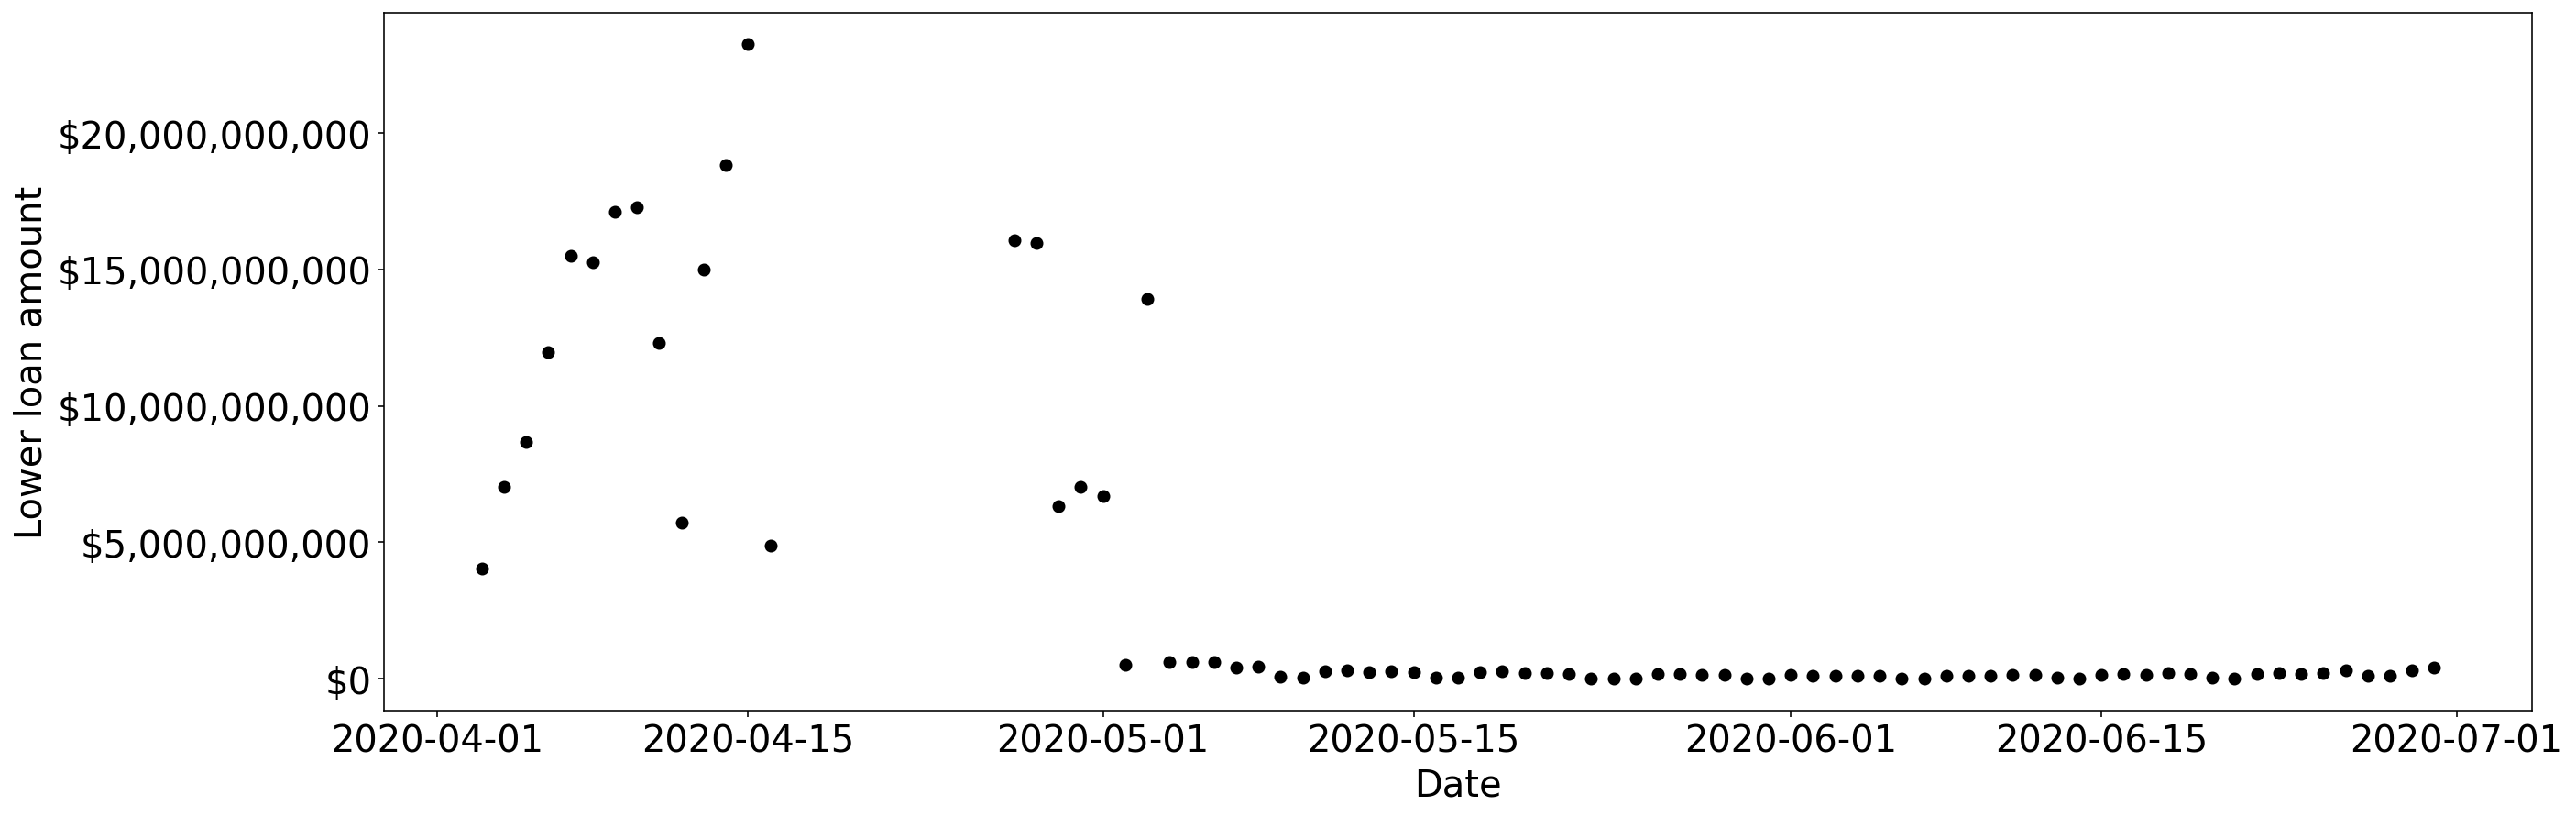

In [56]:
fig, ax = plt.subplots(figsize=(21, 7))

x = df.groupby("date_approved_dt")["loan_lower"].sum().index.values
y = df.groupby("date_approved_dt")["loan_lower"].sum().values

yy = pd.DataFrame({"date":x, "csum": y}).set_index("date").cumsum().values
ax.scatter(x, y, color="k")

kwd = {
    "xlabel": "Date",
    "ylabel": "Lower loan amount"
}
ax.set(**kwd)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

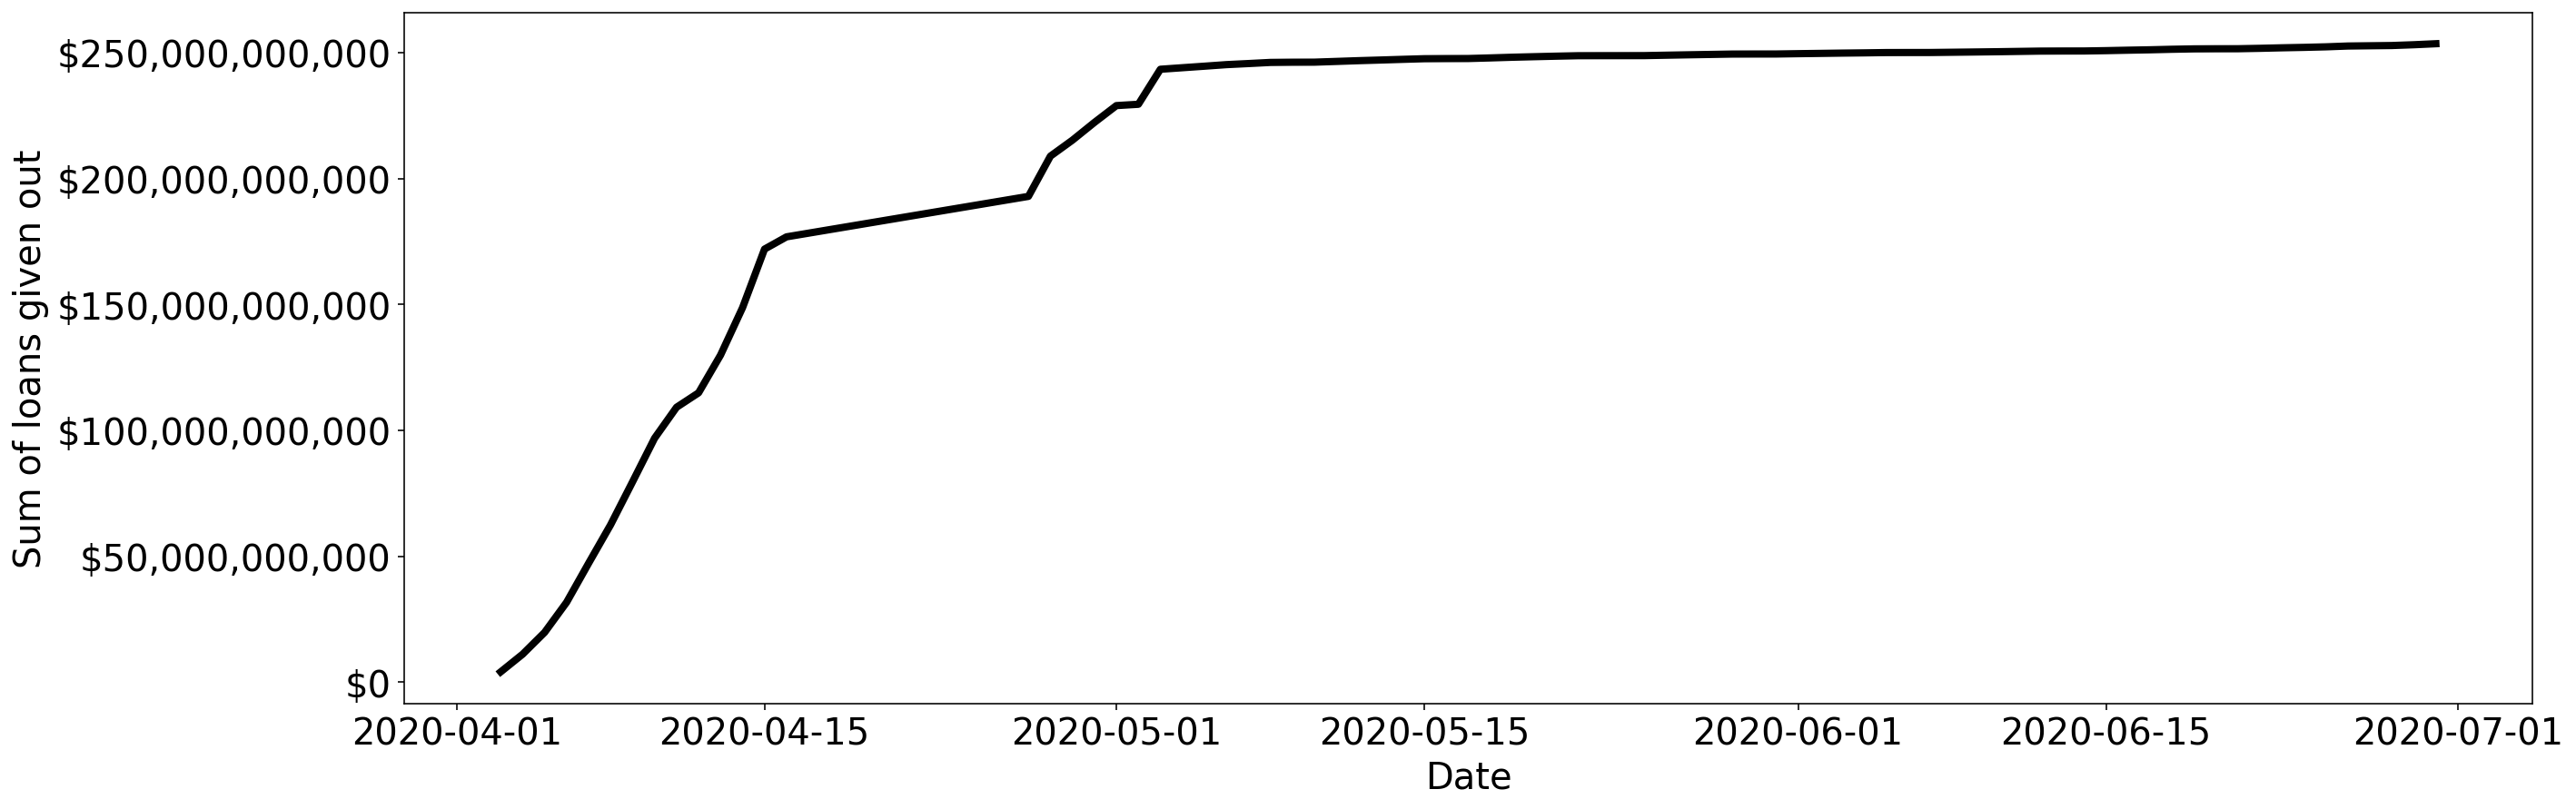

In [55]:
fig, ax = plt.subplots(figsize=(21, 7))

x = df.groupby("date_approved_dt")["loan_lower"].sum().index.values
y = df.groupby("date_approved_dt")["loan_lower"].sum().values

yy = pd.DataFrame({"date":x, "csum": y}).set_index("date").cumsum().values

ax.plot(x, yy, linewidth=4, color="k")

kwd = {
    "xlabel": "Date",
    "ylabel": "Sum of loans given out"
}
ax.set(**kwd)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

# Number of loans per state

In [8]:
pd.DataFrame(df[df.BusinessType.notna()]["BusinessType"].value_counts())

,BusinessType
Corporation,275482
Limited Liability Company(LLC),172643
Subchapter S Corporation,132436
Non-Profit Organization,41819
Partnership,12902
Sole Proprietorship,8774
Limited Liability Partnership,7649
Professional Association,3858
Cooperative,1851
Self-Employed Individuals,683


In [6]:
pd.DataFrame(df[df.State.notna()]["State"].value_counts())

,State
CA,87689
TX,52150
NY,46888
FL,42207
IL,27412
PA,26095
OH,22888
NJ,21858
MI,19971
GA,18291
